### Carregamento

In [1]:
# Importações necessárias
import pandas as pd

# Função para carregar os dados
def carregar_dados(caminho_arquivo, coluna_data=None):
    """
    Carrega um arquivo CSV com dados.
    
    Parâmetros:
    - caminho_arquivo (str): Caminho do arquivo CSV.
    - coluna_data (str, opcional): Nome da coluna de datas para converter para datetime.
    
    Retorna:
    - pandas.DataFrame: DataFrame com os dados carregados.
    """
    # Carrega o CSV
    dados = pd.read_csv(caminho_arquivo)
    
    # Converte a coluna de datas para datetime com timezone, se especificada
    if coluna_data:
        dados[coluna_data] = pd.to_datetime(dados[coluna_data], utc=True)
    
    return dados

# Exemplo de uso da função com coluna de datas 'date'
caminho_arquivo = '../data/processed/train_atualizado.csv'
dados = carregar_dados(caminho_arquivo)

# Exibir as primeiras linhas do DataFrame
dados.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Análise gender


=== RELATÓRIO DE ANÁLISE DE GÊNERO ===

Distribuição total:
- m: 38496 funcionários (70.2%)
- f: 16312 funcionários (29.8%)

Taxa de promoção:
- f: 9.0%
- m: 8.3%

Métricas médias por gênero:

F:
- Idade média: 35.0 anos
- Score médio de treinamento: 63.9
- Taxa média de KPIs atingidos: 37.9%

M:
- Idade média: 34.7 anos
- Score médio de treinamento: 63.2
- Taxa média de KPIs atingidos: 34.0%


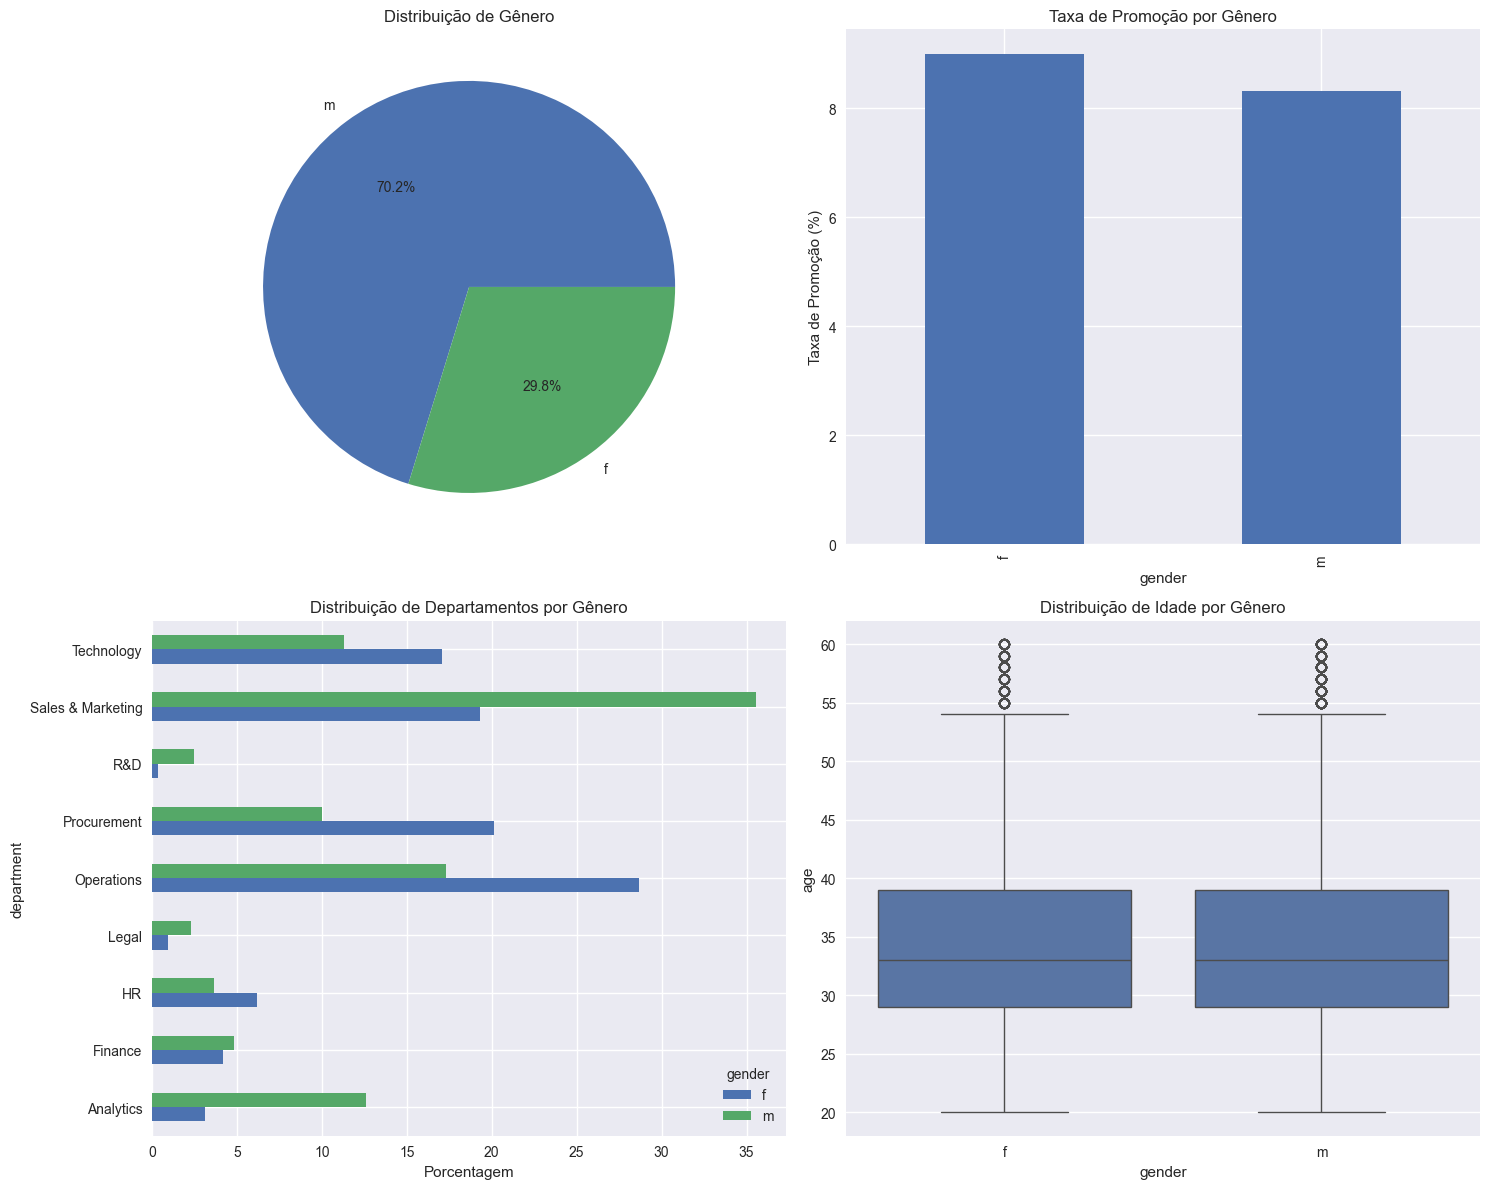

In [9]:
import seaborn as sns

def analisar_gender(df):
    """
    Realiza análise completa da distribuição de gênero e suas relações com outras variáveis
    
    Parâmetros:
    - df: DataFrame com os dados
    
    Retorna:
    - Dict com os resultados das análises
    """
    import matplotlib.pyplot as plt
    
    # Configurações visuais
    plt.style.use('seaborn-v0_8')  # or use 'seaborn-darkgrid')
    
    # Análise univariada de gênero
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Distribuição de gênero
    gender_dist = df['gender'].value_counts()
    axes[0,0].pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%')
    axes[0,0].set_title('Distribuição de Gênero')
    
    # Promoções por gênero
    promotion_by_gender = df.groupby('gender')['is_promoted'].mean() * 100
    promotion_by_gender.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Taxa de Promoção por Gênero')
    axes[0,1].set_ylabel('Taxa de Promoção (%)')
    
    # Distribuição de departamentos por gênero
    dept_gender = pd.crosstab(df['department'], df['gender'], normalize='columns') * 100
    dept_gender.plot(kind='barh', ax=axes[1,0])
    axes[1,0].set_title('Distribuição de Departamentos por Gênero')
    axes[1,0].set_xlabel('Porcentagem')
    
    # Boxplot de idade por gênero
    sns.boxplot(data=df, x='gender', y='age', ax=axes[1,1])
    axes[1,1].set_title('Distribuição de Idade por Gênero')
    
    plt.tight_layout()
    
    # Análises estatísticas
    resultados = {
        'distribuicao_genero': gender_dist.to_dict(),
        'taxa_promocao': promotion_by_gender.to_dict(),
        'media_idade': df.groupby('gender')['age'].mean().to_dict(),
        'media_score': df.groupby('gender')['avg_training_score'].mean().to_dict(),
        'media_kpi': df.groupby('gender')['KPIs_met >80%'].mean().to_dict()
    }
    
    # Relatório textual
    print("\n=== RELATÓRIO DE ANÁLISE DE GÊNERO ===")
    print(f"\nDistribuição total:")
    for genero, qtd in gender_dist.items():
        print(f"- {genero}: {qtd} funcionários ({(qtd/len(df)*100):.1f}%)")
        
    print(f"\nTaxa de promoção:")
    for genero, taxa in promotion_by_gender.items():
        print(f"- {genero}: {taxa:.1f}%")
        
    print("\nMétricas médias por gênero:")
    for genero in df['gender'].unique():
        print(f"\n{genero.upper()}:")
        print(f"- Idade média: {resultados['media_idade'][genero]:.1f} anos")
        print(f"- Score médio de treinamento: {resultados['media_score'][genero]:.1f}")
        print(f"- Taxa média de KPIs atingidos: {resultados['media_kpi'][genero]*100:.1f}%")
    
    return resultados

# Executar a análise
resultados = analisar_gender(dados)

### Análise department


=== RELATÓRIO DE ANÁLISE DEPARTAMENTAL ===

Distribuição e Métricas por Departamento:

SALES & MARKETING:
- Total de funcionários: 16840 (30.7%)
- Taxa de promoção: 7.2%
- Score médio de treinamento: 50.3
- Taxa de KPIs atingidos: 26.5%
- Tempo médio de serviço: 5.9 anos

OPERATIONS:
- Total de funcionários: 11348 (20.7%)
- Taxa de promoção: 9.0%
- Score médio de treinamento: 60.2
- Taxa de KPIs atingidos: 43.1%
- Tempo médio de serviço: 6.4 anos

TECHNOLOGY:
- Total de funcionários: 7138 (13.0%)
- Taxa de promoção: 10.8%
- Score médio de treinamento: 79.9
- Taxa de KPIs atingidos: 34.4%
- Tempo médio de serviço: 5.9 anos

ANALYTICS:
- Total de funcionários: 5352 (9.8%)
- Taxa de promoção: 9.6%
- Score médio de treinamento: 84.6
- Taxa de KPIs atingidos: 40.4%
- Tempo médio de serviço: 4.9 anos

R&D:
- Total de funcionários: 999 (1.8%)
- Taxa de promoção: 6.9%
- Score médio de treinamento: 84.6
- Taxa de KPIs atingidos: 41.6%
- Tempo médio de serviço: 4.6 anos

PROCUREMENT:
- Total de

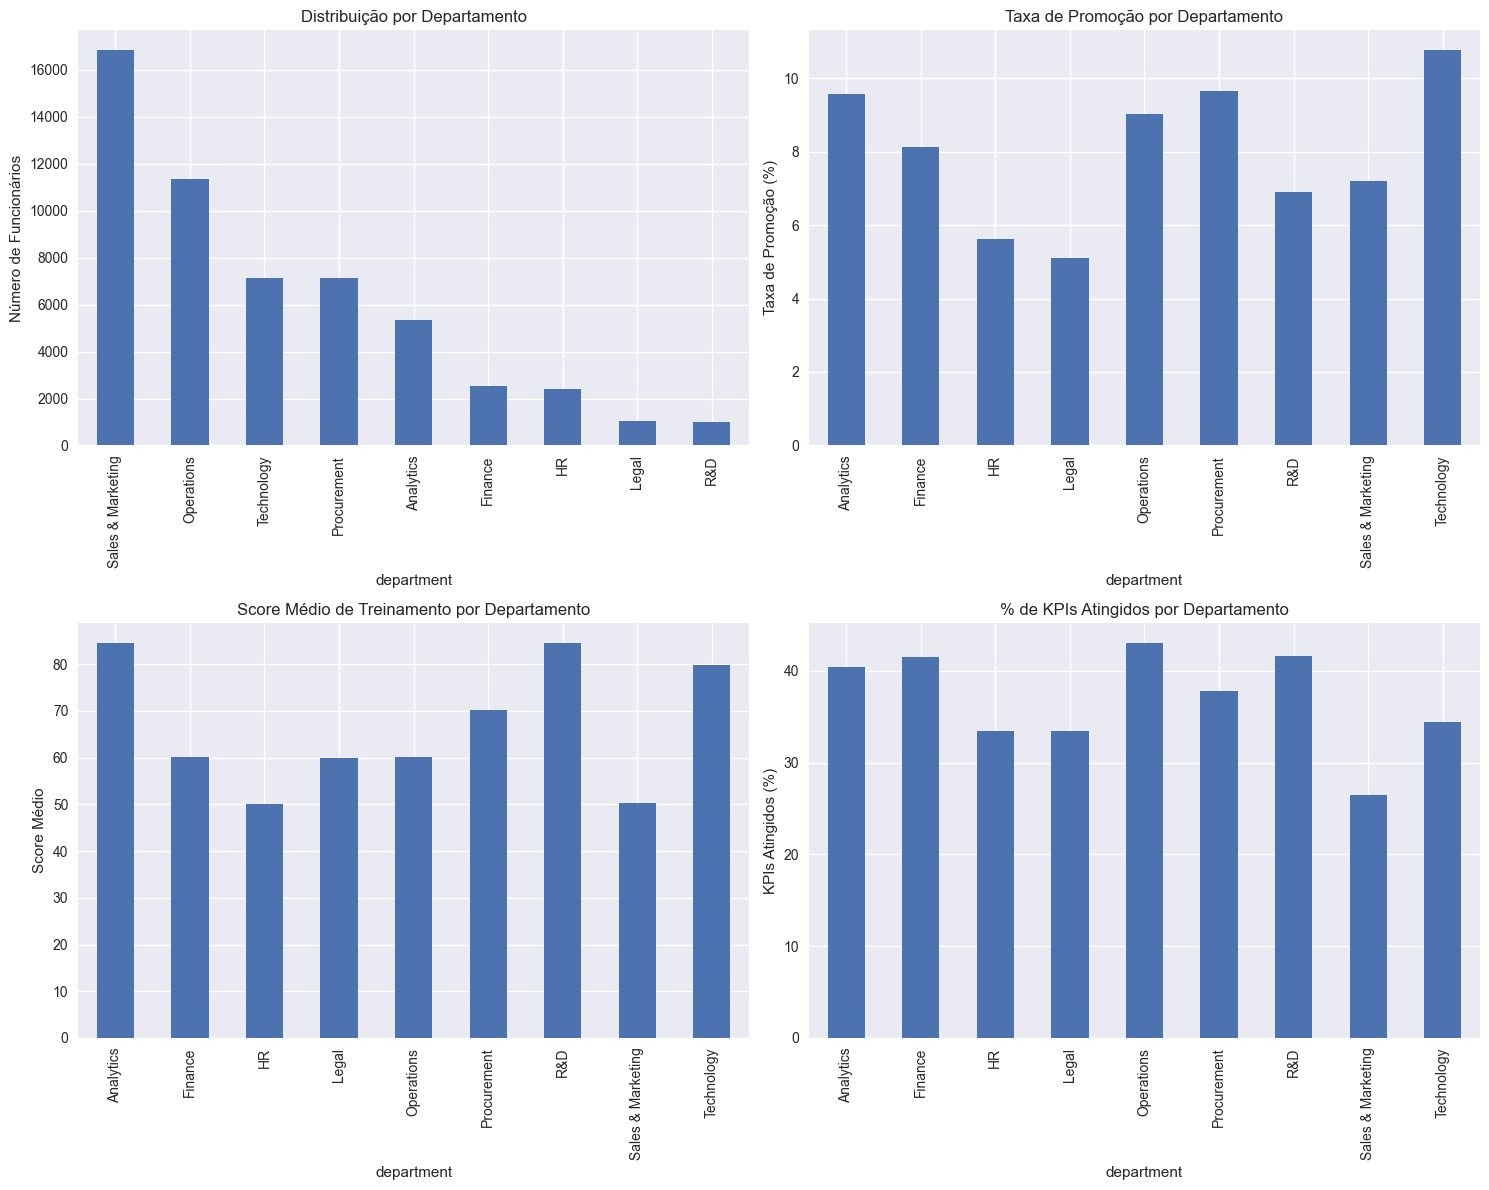

<Figure size 1200x600 with 0 Axes>

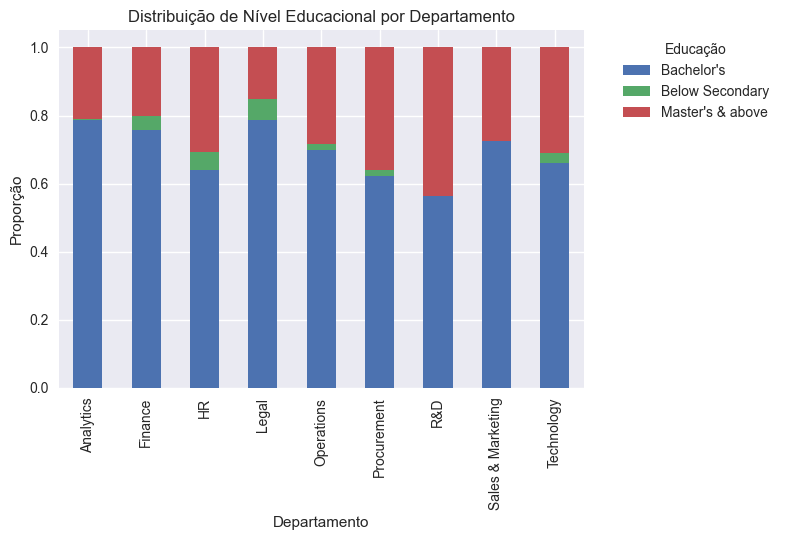

In [10]:
import seaborn as sns

def analisar_department(df):
    """
    Realiza análise completa dos departamentos e suas relações com outras variáveis
    
    Parâmetros:
    - df: DataFrame com os dados
    
    Retorna:
    - Dict com os resultados das análises
    """
    import matplotlib.pyplot as plt
    
    # Configurações visuais
    plt.style.use('seaborn-v0_8')
    
    # Análises básicas
    dept_counts = df['department'].value_counts()
    dept_promotion = df.groupby('department')['is_promoted'].mean() * 100
    dept_scores = df.groupby('department')['avg_training_score'].mean()
    dept_kpis = df.groupby('department')['KPIs_met >80%'].mean() * 100
    dept_service = df.groupby('department')['length_of_service'].mean()
    
    # Visualizações
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Distribuição de departamentos
    dept_counts.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Distribuição por Departamento')
    axes[0,0].set_ylabel('Número de Funcionários')
    
    # Taxa de promoção por departamento
    dept_promotion.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Taxa de Promoção por Departamento')
    axes[0,1].set_ylabel('Taxa de Promoção (%)')
    
    # Scores médios por departamento
    dept_scores.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Score Médio de Treinamento por Departamento')
    axes[1,0].set_ylabel('Score Médio')
    
    # KPIs atingidos por departamento
    dept_kpis.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('% de KPIs Atingidos por Departamento')
    axes[1,1].set_ylabel('KPIs Atingidos (%)')
    
    plt.tight_layout()
    
    # Análise adicional: Distribuição de educação por departamento
    plt.figure(figsize=(12, 6))
    pd.crosstab(df['department'], df['education'], normalize='index').plot(kind='bar', stacked=True)
    plt.title('Distribuição de Nível Educacional por Departamento')
    plt.xlabel('Departamento')
    plt.ylabel('Proporção')
    plt.legend(title='Educação', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    
    # Resultados para o relatório
    resultados = {
        'contagem': dept_counts.to_dict(),
        'promocao': dept_promotion.to_dict(),
        'scores': dept_scores.to_dict(),
        'kpis': dept_kpis.to_dict(),
        'tempo_servico': dept_service.to_dict()
    }
    
    print("\n=== RELATÓRIO DE ANÁLISE DEPARTAMENTAL ===")
    print("\nDistribuição e Métricas por Departamento:")
    
    for dept in df['department'].unique():
        total_func = dept_counts[dept]
        print(f"\n{dept.upper()}:")
        print(f"- Total de funcionários: {total_func} ({(total_func/len(df)*100):.1f}%)")
        print(f"- Taxa de promoção: {dept_promotion[dept]:.1f}%")
        print(f"- Score médio de treinamento: {dept_scores[dept]:.1f}")
        print(f"- Taxa de KPIs atingidos: {dept_kpis[dept]:.1f}%")
        print(f"- Tempo médio de serviço: {dept_service[dept]:.1f} anos")
    
    print("\nINSIGHTS PRINCIPAIS:")
    # Taxa de promoção
    dept_mais_promove = dept_promotion.idxmax()
    dept_menos_promove = dept_promotion.idxmin()
    print(f"\n1. Promoções:")
    print(f"- {dept_mais_promove} tem a maior taxa de promoção: {dept_promotion[dept_mais_promove]:.1f}%")
    print(f"- {dept_menos_promove} tem a menor taxa de promoção: {dept_promotion[dept_menos_promove]:.1f}%")
    
    # Performance
    dept_melhor_score = dept_scores.idxmax()
    print(f"\n2. Performance:")
    print(f"- {dept_melhor_score} tem o melhor score médio de treinamento: {dept_scores[dept_melhor_score]:.1f}")
    print(f"- Departamentos técnicos (Technology, Analytics) tendem a ter scores mais altos")
    
    # Tempo de serviço
    dept_mais_tempo = dept_service.idxmax()
    print(f"\n3. Retenção:")
    print(f"- {dept_mais_tempo} tem o maior tempo médio de serviço: {dept_service[dept_mais_tempo]:.1f} anos")
    
    return resultados

# Executar a análise
resultados_dept = analisar_department(dados)

### Análise region


=== RELATÓRIO DE ANÁLISE REGIONAL ===

ESTATÍSTICAS GERAIS:
Total de regiões: 34
Média de funcionários por região: 1612.0
Mediana de funcionários por região: 838.5

TOP 5 REGIÕES POR NÚMERO DE FUNCIONÁRIOS:
- region_2: 12343 funcionários (22.5%)
- region_22: 6428 funcionários (11.7%)
- region_7: 4843 funcionários (8.8%)
- region_15: 2808 funcionários (5.1%)
- region_13: 2648 funcionários (4.8%)

TOP 5 REGIÕES POR TAXA DE PROMOÇÃO:
- region_4: 14.4%
- region_17: 13.7%
- region_25: 12.6%
- region_28: 11.7%
- region_23: 11.7%

INSIGHTS PRINCIPAIS:

1. Distribuição de Funcionários:
- A região region_2 concentra 22.5% dos funcionários
- As 5 maiores regiões representam 53.0% do total

2. Performance:
- region_33 tem o melhor score médio: 68.0
- Variação de scores entre regiões: 16.9 pontos

3. Correlações:
- Correlação entre scores e promoções por região: 0.12


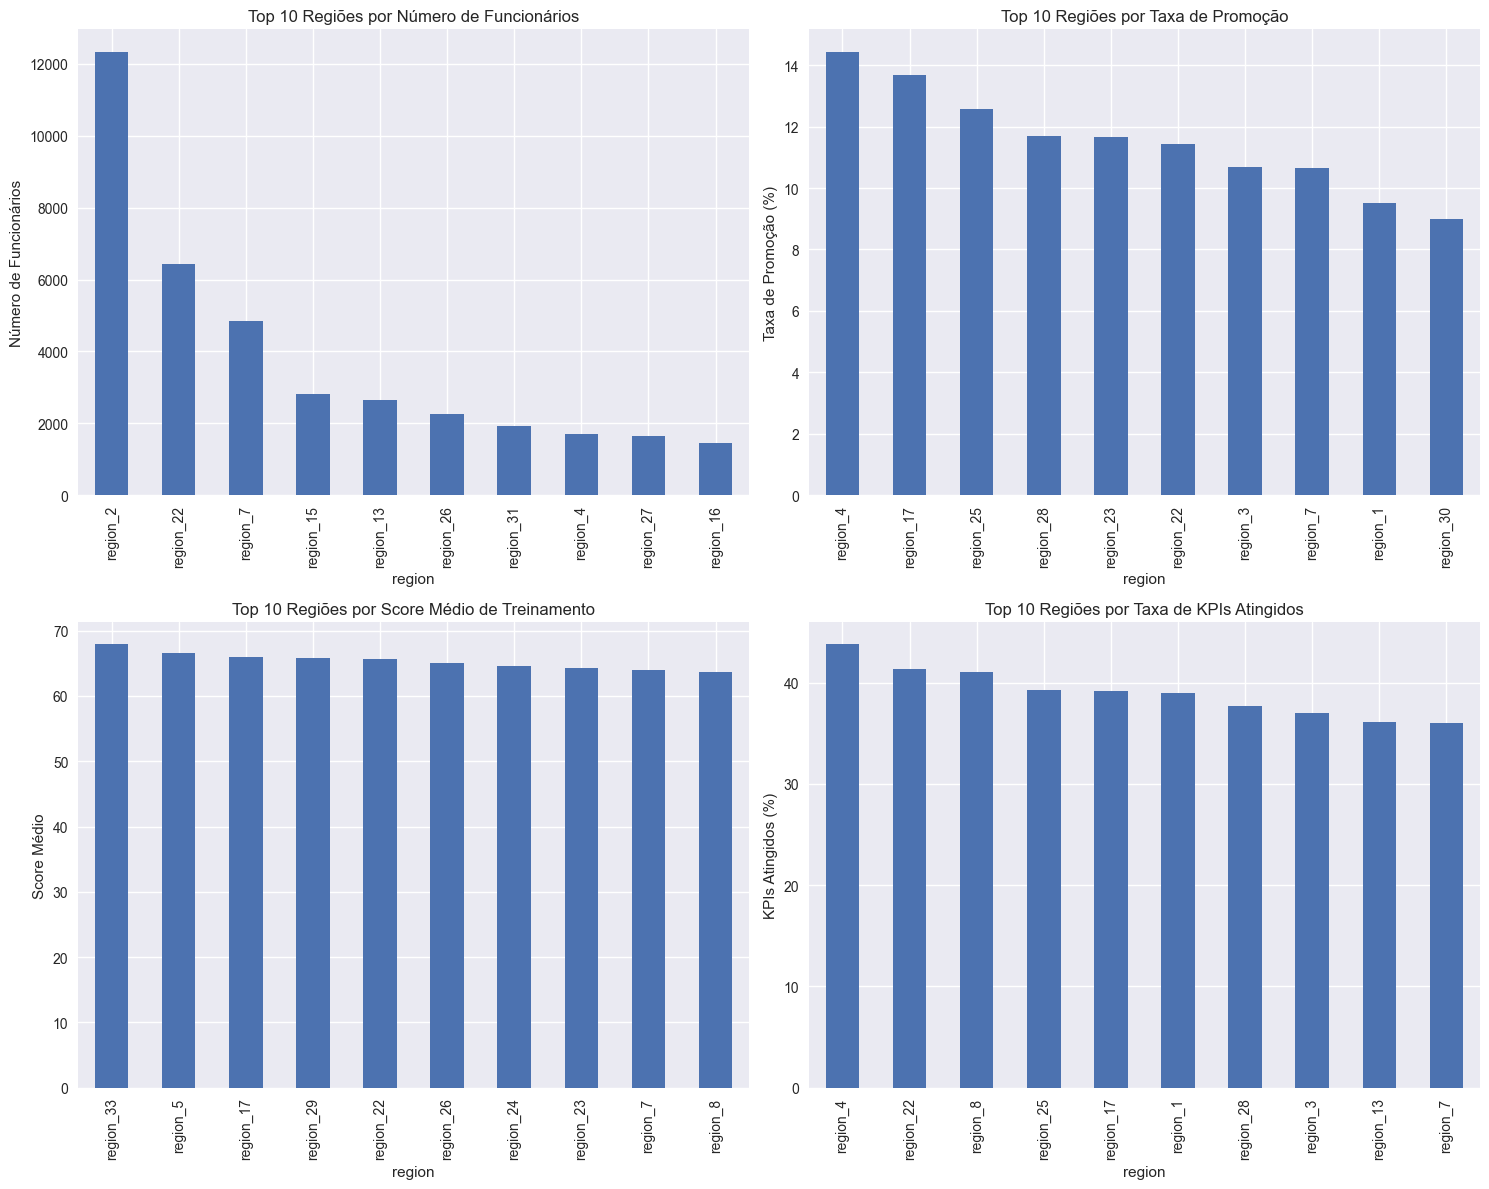

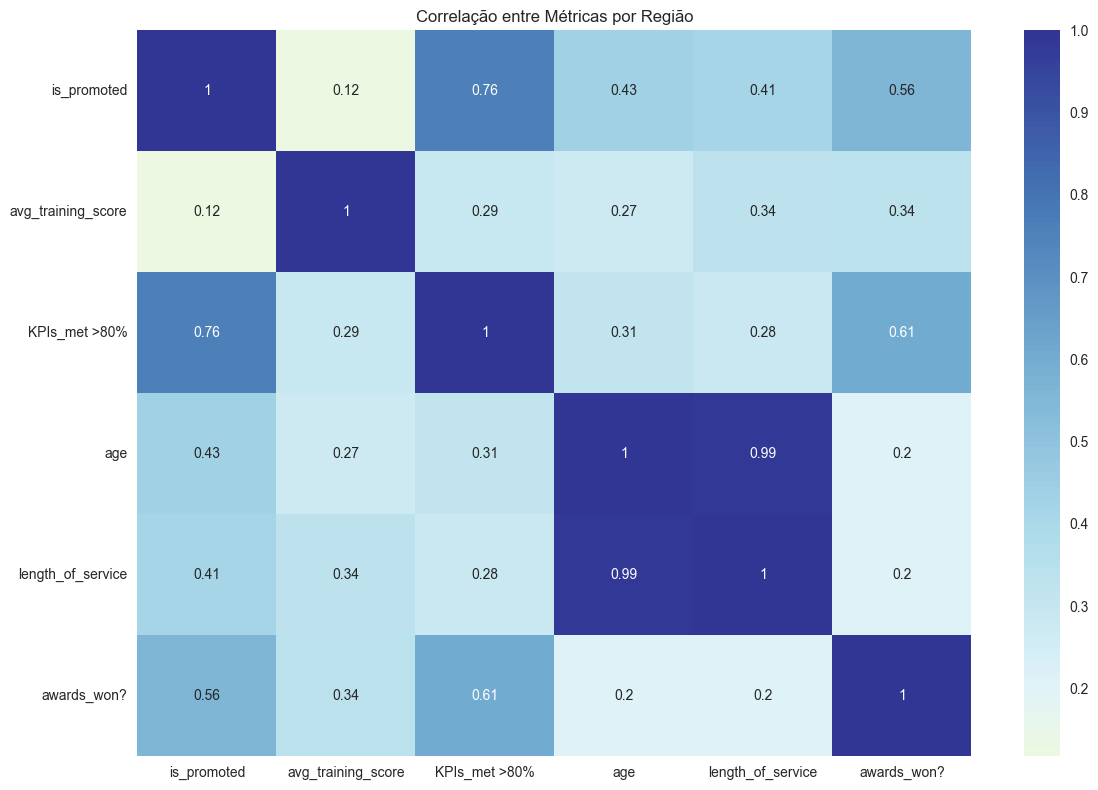

<Figure size 1500x600 with 0 Axes>

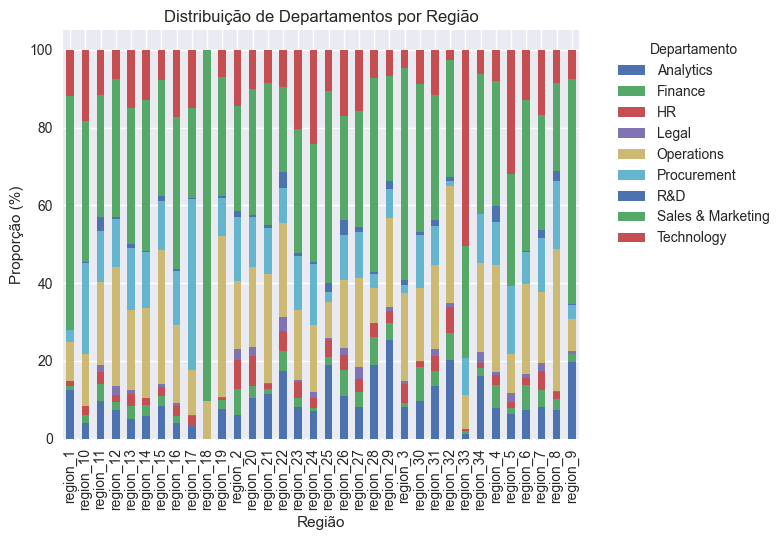

In [2]:
import seaborn as sns

def analisar_region(df):
    """
    Realiza análise completa das regiões e suas relações com outras variáveis.
    
    Parâmetros:
    - df: DataFrame com os dados
    
    Retorna:
    - Dict com os resultados das análises
    """
    import matplotlib.pyplot as plt
    
    # Configurações visuais
    plt.style.use('seaborn-v0_8')
    
    # Análises básicas por região
    region_counts = df['region'].value_counts()
    region_promotion = df.groupby('region')['is_promoted'].mean() * 100
    region_scores = df.groupby('region')['avg_training_score'].mean()
    region_kpis = df.groupby('region')['KPIs_met >80%'].mean() * 100
    
    # Cria visualizações
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Top 10 regiões por número de funcionários
    region_counts.head(10).plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Top 10 Regiões por Número de Funcionários')
    axes[0,0].set_ylabel('Número de Funcionários')
    
    # Top 10 regiões por taxa de promoção
    region_promotion.sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Top 10 Regiões por Taxa de Promoção')
    axes[0,1].set_ylabel('Taxa de Promoção (%)')
    
    # Distribuição de scores por região (top 10)
    region_scores.sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Top 10 Regiões por Score Médio de Treinamento')
    axes[1,0].set_ylabel('Score Médio')
    
    # Taxa de KPIs atingidos por região (top 10)
    region_kpis.sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Top 10 Regiões por Taxa de KPIs Atingidos')
    axes[1,1].set_ylabel('KPIs Atingidos (%)')
    
    plt.tight_layout()
    
    # Análise adicional: Mapa de calor das correlações por região
    plt.figure(figsize=(12, 8))
    region_metrics = df.groupby('region').agg({
        'is_promoted': 'mean',
        'avg_training_score': 'mean',
        'KPIs_met >80%': 'mean',
        'age': 'mean',
        'length_of_service': 'mean',
        'awards_won?': 'mean'
    })
    
    sns.heatmap(region_metrics.corr(), annot=True, cmap='RdYlBu', center=0)
    plt.title('Correlação entre Métricas por Região')
    plt.tight_layout()
    
    # Análise de distribuição departamental por região
    plt.figure(figsize=(15, 6))
    dept_region = pd.crosstab(df['region'], df['department'], normalize='index') * 100
    dept_region.plot(kind='bar', stacked=True)
    plt.title('Distribuição de Departamentos por Região')
    plt.xlabel('Região')
    plt.ylabel('Proporção (%)')
    plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    
    # Resultados para o relatório
    resultados = {
        'contagem': region_counts.to_dict(),
        'promocao': region_promotion.to_dict(),
        'scores': region_scores.to_dict(),
        'kpis': region_kpis.to_dict()
    }
    
    print("\n=== RELATÓRIO DE ANÁLISE REGIONAL ===")
    
    print("\nESTATÍSTICAS GERAIS:")
    print(f"Total de regiões: {len(region_counts)}")
    print(f"Média de funcionários por região: {region_counts.mean():.1f}")
    print(f"Mediana de funcionários por região: {region_counts.median():.1f}")
    
    print("\nTOP 5 REGIÕES POR NÚMERO DE FUNCIONÁRIOS:")
    for region, count in region_counts.head().items():
        print(f"- {region}: {count} funcionários ({(count/len(df)*100):.1f}%)")
    
    print("\nTOP 5 REGIÕES POR TAXA DE PROMOÇÃO:")
    top_promotion = region_promotion.sort_values(ascending=False).head()
    for region, rate in top_promotion.items():
        print(f"- {region}: {rate:.1f}%")
    
    print("\nINSIGHTS PRINCIPAIS:")
    
    # Concentração de funcionários
    top_region = region_counts.idxmax()
    print(f"\n1. Distribuição de Funcionários:")
    print(f"- A região {top_region} concentra {(region_counts[top_region]/len(df)*100):.1f}% dos funcionários")
    print(f"- As 5 maiores regiões representam {(region_counts.head().sum()/len(df)*100):.1f}% do total")
    
    # Performance
    top_score_region = region_scores.idxmax()
    print(f"\n2. Performance:")
    print(f"- {top_score_region} tem o melhor score médio: {region_scores[top_score_region]:.1f}")
    print(f"- Variação de scores entre regiões: {region_scores.max() - region_scores.min():.1f} pontos")
    
    # Promoções
    promotion_correlation = df.groupby('region').agg({
        'is_promoted': 'mean',
        'avg_training_score': 'mean'
    }).corr().iloc[0,1]
    
    print(f"\n3. Correlações:")
    print(f"- Correlação entre scores e promoções por região: {promotion_correlation:.2f}")
    
    return resultados

# Executar a análise
resultados_region = analisar_region(dados)